In [57]:
%pylab inline
from parcels import FieldSet, Field, ParticleSet, JITParticle, AdvectionRK4, ErrorCode, Variable
#import cartopy
from glob import glob
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
import xarray as xr
from netCDF4 import Dataset
import math as math
#from ParticlePlotFunctions import *
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [83]:
# Galapagos domain
latdim = np.arange(1000,2001)
londim = np.arange(2000,3001)

# read netcdf file and get content of variables
ddir = '/projects/0/topios/hydrodynamic_data/NEMO-MEDUSA/ORCA0083-N006/means/'
Ufile = ddir+'ORCA0083-N06_20000504d05U.nc'
Vfile = ddir+'ORCA0083-N06_20000504d05V.nc'
Tfile = ddir+'ORCA0083-N06_20000504d05T.nc'

dfile = Dataset(Ufile)
Uvel = dfile.variables['uo'][0,0,latdim,londim]
lat = dfile.variables['nav_lat'][latdim,londim]
lon = dfile.variables['nav_lon'][latdim,londim]
dfile = Dataset(Vfile)
Vvel = dfile.variables['vo'][0,0,latdim,londim]
dfile = Dataset(Tfile)
Tvel = dfile.variables['sst'][0,latdim,londim]

#for i in dfile.variables:
#    print([i, dfile.variables[i].shape])

In [ ]:
# work on reading in multiple files to compute year-mean

Text(0, 0.5, 'speed (m/s)')

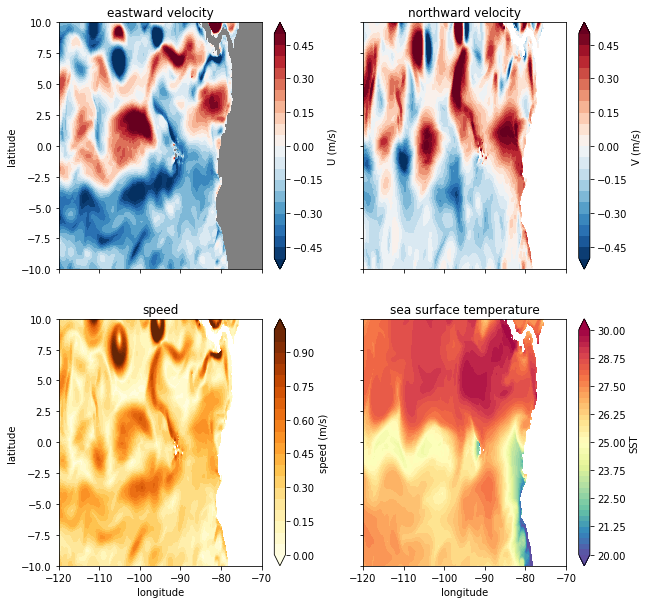

In [82]:
# makes figures with four panels for U, V, speed and SST

map_extent = [-120,-70,-10,10]
speed = np.sqrt(Uvel**2 + Vvel**2)

fig, ax = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)

levels = np.linspace(-0.5, 0.5, 21)
fig1 = ax[0,0].contourf(lon,lat,Uvel,       
                        levels = levels,    
                        cmap='RdBu_r',       
                        extend='both',      
                        origin='lower')     
ax[0,0].set_title('eastward velocity')          
#ax[0,0].set_xlabel('longitude')                 
ax[0,0].set_ylabel('latitude') 
ax[0,0].set_xlim(map_extent[0:2])
ax[0,0].set_ylim(map_extent[2:4])
ax[0,0].set_facecolor('gray')
cbar = plt.colorbar(fig1, ax=ax[0,0])
cbar.ax.set_ylabel('U (m/s)')  

levels = np.linspace(-0.5, 0.5, 21)
fig2 = ax[0,1].contourf(lon,lat,Vvel,       
                        levels = levels,    
                        cmap='RdBu_r',       
                        extend='both',      
                        origin='lower')     
ax[0,1].set_title('northward velocity')          
#ax[0,1].set_xlabel('longitude')                 
#ax[0,1].set_ylabel('latitude') 
ax[0,1].set_xlim(map_extent[0:2])
ax[0,1].set_ylim(map_extent[2:4])
ax[0,0].set_facecolor('gray')
cbar = plt.colorbar(fig2, ax=ax[0,1])
cbar.ax.set_ylabel('V (m/s)') 

levels = np.linspace(20, 30, 41)
fig2 = ax[1,1].contourf(lon,lat,Tvel,       
                        levels = levels,    
                        cmap='Spectral_r',       
                        extend='both',      
                        origin='lower')     
ax[1,1].set_title('sea surface temperature')          
ax[1,1].set_xlabel('longitude')                 
#ax[1,1].set_ylabel('latitude') 
ax[1,1].set_xlim(map_extent[0:2])
ax[1,1].set_ylim(map_extent[2:4])
ax[0,0].set_facecolor('gray')
cbar = plt.colorbar(fig2, ax=ax[1,1])
cbar.ax.set_ylabel('SST') 

levels = np.linspace(0, 1, 21)
fig2 = ax[1,0].contourf(lon,lat,speed,       
                        levels = levels,    
                        cmap='YlOrBr',       
                        extend='both',      
                        origin='lower')     
ax[1,0].set_title('speed')          
ax[1,0].set_xlabel('longitude')                 
ax[1,0].set_ylabel('latitude') 
ax[1,0].set_xlim(map_extent[0:2])
ax[1,0].set_ylim(map_extent[2:4])
ax[0,0].set_facecolor('gray')
cbar = plt.colorbar(fig2, ax=ax[1,0])
cbar.ax.set_ylabel('speed (m/s)')


In [65]:
# work on making quiver plot U,V on top of SST
